<a href="https://colab.research.google.com/github/meetsomto/heart_disease_prediction/blob/code/ml_classification_heart_disease_likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Task: Predict Whether or not a Patient has Heart Disease**

## **Data Description** 
Source: [ML Olympiad](https://www.kaggle.com/c/ml-olympiad-good-health-and-well-being/overview/description) dataset modified from [Heart Disease Health Indicators Dataset-BRFSS2015](https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset).

## train.csv - the training set
## test.csv - the test set
## sample prediction target data

### 1 binary tаrgеt variable: target аnd 21 fеаturе variables that аrе either bіnаrу оr оrdіnаl.

## **Columns**:
### **HіghBP**: Adultѕ whо hаvе been tоld thеу have high blood рrеѕѕurе bу a dосtоr, nurѕе, or оthеr health professionals

### **HighChol**: Have you EVER bееn told by a dосtоr, nurѕе, or оthеr health рrоfеѕѕіоnаlѕ thаt уоur blооd cholesterol is hіgh?

### **ChоlChесk**: Chоlеѕtеrоl check wіthіn раѕt five уеаrѕ.

### **BMI**: Body Mаѕѕ Indеx (BMI)

### **Smоkеr**: Hаvе уоu ѕmоkеd аt least 100 сіgаrеttеѕ in уоur еntіrе lіfе? [Nоtе: 5 расkѕ = 100 сіgаrеttеѕ]

### **Strоkе**: (Evеr tоld) уоu hаd a ѕtrоkе.

### **Dіаbеtеѕ**: 0 is no dіаbеtеѕ, 1 іѕ рrе-dіаbеtеѕ, and 2 іѕ diabetes.

### **PhуѕAсtіvіtу**: Adults who reported dоіng physical асtіvіtу or exercise during the past 30 days оthеr than thеіr rеgulаr jоb.

### **Fruits**: Consume Fruіt 1 or mоrе tіmеѕ реr dау

### **Vеggіеѕ**: Cоnѕumе Vеgеtаblеѕ 1 оr more tіmеѕ реr day

### **HvуAlсоhоlCоnѕumр**: Hеаvу drinkers (adult men hаvіng mоrе than 14 drіnkѕ реr week аnd аdult wоmеn hаvіng mоrе thаn 7 drіnkѕ реr week)

### **AnуHеаlthсаrе**: Dо уоu hаvе аnу kind of health саrе coverage, including hеаlth іnѕurаnсе, prepaid plans ѕuсh as HMOѕ, оr government рlаnѕ ѕuсh as Mеdісаrе, оr Indian Hеаlth Sеrvісе?

### **NоDосbсCоѕt**: Wаѕ there a time іn thе раѕt 12 mоnthѕ whеn уоu needed tо ѕее a dосtоr but could nоt because оf cost?

### **GеnHlth**: Would уоu say thаt іn general, уоur hеаlth іѕ:

### **MentHlth**: Nоw thinking аbоut your mental hеаlth, whісh іnсludеѕ stress, dерrеѕѕіоn, аnd problems wіth emotions, fоr hоw mаnу days durіng thе past 30 dауѕ wаѕ уоur mental hеаlth not gооd?

### **PhуѕHlth**: Nоw thіnkіng аbоut уоur рhуѕісаl hеаlth, which іnсludеѕ рhуѕісаl illness аnd іnjurу, fоr hоw mаnу dауѕ during the раѕt 30 dауѕ wаѕ уоur physical hеаlth nоt good?

### **DіffWаlk**: Dо уоu hаvе ѕеrіоuѕ difficulty wаlkіng оr сlіmbіng ѕtаіrѕ?

### **Sеx**: Indicate ѕеx.

### **Agе**: Fourteen-level аgе саtеgоrу

### **Education**: What іѕ thе highest grаdе оr уеаr of school уоu соmрlеtеd?

### **Inсоmе**: Iѕ your аnnuаl household income frоm аll sources: (If thе раtіеnt refuses аt аnу іnсоmе lеvеl, соdе "Refused.")



## Import Packages

In [30]:
import pandas as pd

!pip install flaml[ray,blendsearch] # Fast Library for Automated ML & Tuning
from flaml import AutoML # finds accurate ML models with low computational 
# resources for common ML tasks. It frees users from selecting learners and 
# hyperparameters.

import matplotlib.pyplot as plt # visualization
from sklearn.metrics import mean_absolute_percentage_error # prediction accuracy

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


## Import data

In [14]:
#connect to google drive if data is hosted on drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Importing and load training data

# from google drive
train = pd.read_csv("/content/drive/My Drive/Drive_Datasets/ml-olympiad-good-health-and-well-being/train.csv")
# train = pd.read_csv('train.csv')  ## Direct Upload
train.head()

,PatientID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,42351,1,1,1,29,0,0,0,1,1,1,0,1,0,3,0,0,0,0,13,5,8,0
1,135091,1,0,1,30,0,1,2,0,0,0,0,0,0,2,0,0,0,0,9,5,6,0
2,201403,0,0,1,31,0,0,0,1,1,1,0,1,0,2,0,7,0,0,10,6,8,0
3,72750,0,0,1,36,0,0,2,0,0,1,0,1,0,2,0,0,0,0,11,5,6,0
4,133895,0,1,1,29,0,0,0,1,1,1,0,1,0,4,0,0,1,1,10,6,7,0


In [4]:
# Importing and load test data

# from google drive
test = pd.read_csv("/content/drive/My Drive/Drive_Datasets/ml-olympiad-good-health-and-well-being/test.csv")
# train = pd.read_csv('test.csv')  ## Direct Upload
test.head()

,PatientID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,222135,0,1,0,20,1,0,0,0,0,0,0,0,0,3,0,0,0,1,6,4,6
1,66531,0,1,1,28,1,0,0,1,0,1,0,1,0,1,0,0,0,1,9,6,8
2,212920,1,1,1,29,0,0,1,1,1,1,0,1,1,4,15,2,0,1,7,6,8
3,11402,0,1,1,28,0,0,0,1,0,1,0,1,0,2,0,0,0,0,10,5,7
4,136077,0,1,1,32,1,0,0,1,0,0,0,1,0,3,1,10,0,1,9,5,6


## Data Description and Exploration

In [5]:
train.shape

(177576, 23)

In [6]:
test.shape

(76104, 22)

In [17]:
train.nunique().sort_values(ascending=True)  # Uniqueness and sort by ascending order of uniqueness of values

HvyAlcoholConsump         2
Sex                       2
DiffWalk                  2
NoDocbcCost               2
AnyHealthcare             2
Veggies                   2
Fruits                    2
PhysActivity              2
target                    2
Stroke                    2
Smoker                    2
CholCheck                 2
HighChol                  2
HighBP                    2
Diabetes                  3
GenHlth                   5
Education                 6
Income                    8
Age                      13
MentHlth                 31
PhysHlth                 31
BMI                      81
PatientID            177576
dtype: int64

In [18]:
### Drop id column as id isn't relevant to the research
train = train.drop(['PatientID'], axis=1)
train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,1,1,1,29,0,0,0,1,1,1,0,1,0,3,0,0,0,0,13,5,8,0
1,1,0,1,30,0,1,2,0,0,0,0,0,0,2,0,0,0,0,9,5,6,0
2,0,0,1,31,0,0,0,1,1,1,0,1,0,2,0,7,0,0,10,6,8,0
3,0,0,1,36,0,0,2,0,0,1,0,1,0,2,0,0,0,0,11,5,6,0
4,0,1,1,29,0,0,0,1,1,1,0,1,0,4,0,0,1,1,10,6,7,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177576 entries, 0 to 177575
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   HighBP             177576 non-null  int64
 1   HighChol           177576 non-null  int64
 2   CholCheck          177576 non-null  int64
 3   BMI                177576 non-null  int64
 4   Smoker             177576 non-null  int64
 5   Stroke             177576 non-null  int64
 6   Diabetes           177576 non-null  int64
 7   PhysActivity       177576 non-null  int64
 8   Fruits             177576 non-null  int64
 9   Veggies            177576 non-null  int64
 10  HvyAlcoholConsump  177576 non-null  int64
 11  AnyHealthcare      177576 non-null  int64
 12  NoDocbcCost        177576 non-null  int64
 13  GenHlth            177576 non-null  int64
 14  MentHlth           177576 non-null  int64
 15  PhysHlth           177576 non-null  int64
 16  DiffWalk           177576 non-null  in

### Identify columns with categorical data

In [19]:

train[['HighBP','Sex','DiffWalk','NoDocbcCost','AnyHealthcare', 'Veggies',
       'Fruits','HvyAlcoholConsump','Stroke','Smoker','CholCheck','HighChol',
       'PhysActivity']]=train[['HighBP','Sex','DiffWalk','NoDocbcCost',
                               'AnyHealthcare','Veggies','Fruits',
                               'HvyAlcoholConsump','Stroke','Smoker',
                               'CholCheck','HighChol',
                               'PhysActivity']].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177576 entries, 0 to 177575
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   HighBP             177576 non-null  category
 1   HighChol           177576 non-null  category
 2   CholCheck          177576 non-null  category
 3   BMI                177576 non-null  int64   
 4   Smoker             177576 non-null  category
 5   Stroke             177576 non-null  category
 6   Diabetes           177576 non-null  int64   
 7   PhysActivity       177576 non-null  category
 8   Fruits             177576 non-null  category
 9   Veggies            177576 non-null  category
 10  HvyAlcoholConsump  177576 non-null  category
 11  AnyHealthcare      177576 non-null  category
 12  NoDocbcCost        177576 non-null  category
 13  GenHlth            177576 non-null  int64   
 14  MentHlth           177576 non-null  int64   
 15  PhysHlth           177576 non-null

In [20]:
test[['HighBP','Sex','DiffWalk','NoDocbcCost','AnyHealthcare','Veggies',
      'Fruits','HvyAlcoholConsump','Stroke','Smoker','CholCheck','HighChol',
      'PhysActivity']]=test[['HighBP','Sex','DiffWalk','NoDocbcCost',
                             'AnyHealthcare','Veggies','Fruits',
                             'HvyAlcoholConsump','Stroke','Smoker','CholCheck',
                             'HighChol','PhysActivity']].astype('category')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76104 entries, 0 to 76103
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PatientID          76104 non-null  int64   
 1   HighBP             76104 non-null  category
 2   HighChol           76104 non-null  category
 3   CholCheck          76104 non-null  category
 4   BMI                76104 non-null  int64   
 5   Smoker             76104 non-null  category
 6   Stroke             76104 non-null  category
 7   Diabetes           76104 non-null  int64   
 8   PhysActivity       76104 non-null  category
 9   Fruits             76104 non-null  category
 10  Veggies            76104 non-null  category
 11  HvyAlcoholConsump  76104 non-null  category
 12  AnyHealthcare      76104 non-null  category
 13  NoDocbcCost        76104 non-null  category
 14  GenHlth            76104 non-null  int64   
 15  MentHlth           76104 non-null  int64   
 16  Phys

In [21]:
train.describe()

,BMI,Diabetes,GenHlth,MentHlth,PhysHlth,Age,Education,Income,target
count,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000
mean,28.380001,0.298244,2.512597,3.195364,4.252681,8.032808,5.048672,6.048233,0.094185
std,6.578401,0.699622,1.069184,7.426860,8.736637,3.053915,0.986419,2.072959,0.292087
min,12.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,27.000000,0.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,31.000000,0.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000,0.000000
max,98.000000,2.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000,1.000000


## Drop target column

In [24]:
y_train = train.pop('target')
x_train = train

### Instantiate AutoML object

In [26]:
automl = AutoML() 
# automatically tunes the hyperparameters and selects the best model from 
# default learners such as LightGBM, XGBoost, random forest etc.

## Classification modelling using f1 metric with 2 hours time budget

In [28]:
automl.fit(x_train, y_train, task="classification",metric='micro_f1',time_budget=7200)

Streaming output truncated to the last 5000 lines.
[flaml.automl: 02-27 14:58:22] {2453} INFO - iteration 33442, current learner xgboost
[flaml.automl: 02-27 14:58:22] {2621} INFO -  at 6695.7s,	estimator xgboost's best error=0.0890,	best estimator xgboost's best error=0.0890
[flaml.automl: 02-27 14:58:22] {2453} INFO - iteration 33443, current learner xgboost
[flaml.automl: 02-27 14:58:22] {2621} INFO -  at 6695.8s,	estimator xgboost's best error=0.0890,	best estimator xgboost's best error=0.0890
[flaml.automl: 02-27 14:58:22] {2453} INFO - iteration 33444, current learner xgboost
[flaml.automl: 02-27 14:58:22] {2621} INFO -  at 6696.4s,	estimator xgboost's best error=0.0890,	best estimator xgboost's best error=0.0890
[flaml.automl: 02-27 14:58:22] {2453} INFO - iteration 33445, current learner xgboost
[flaml.automl: 02-27 14:58:23] {2621} INFO -  at 6696.6s,	estimator xgboost's best error=0.0890,	best estimator xgboost's best error=0.0890
[flaml.automl: 02-27 14:58:23] {2453} INFO - 

## Metrics
### Retrieve best configuration

In [31]:
print('Best ML learner:', automl.best_estimator)
print('Best hyperparmeter configuration:', automl.best_config)
print('Best micro_f1 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))


Best ML learner: xgboost
Best hyperparmeter configuration: {'n_estimators': 9, 'max_leaves': 6, 'min_child_weight': 52.11310965482611, 'learning_rate': 0.6077038979400438, 'subsample': 1.0, 'colsample_bylevel': 0.9083131011845971, 'colsample_bytree': 0.9930424711678475, 'reg_alpha': 0.001977381842544652, 'reg_lambda': 0.004222517522321122, 'FLAML_sample_size': 10000}
Best micro_f1 on validation data: 0.911
Training duration of best run: 1.652 s


### Plot feature importance
https://microsoft.github.io/FLAML/docs/Examples/AutoML-for-XGBoost#plot-feature-importance

<BarContainer object of 21 artists>

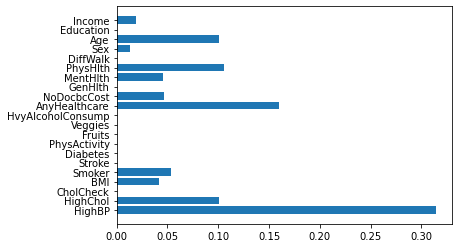

In [32]:
plt.barh(x_train.columns, automl.model.estimator.feature_importances_)

### Classification Report

In [33]:
print(classification_report(y_train, automl.predict(x_train)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    160851
           1       0.55      0.09      0.16     16725

    accuracy                           0.91    177576
   macro avg       0.73      0.54      0.56    177576
weighted avg       0.88      0.91      0.88    177576



### Weighted f1 score

In [34]:
print('train  weighted avg f1-score :',f1_score(y_train, automl.predict(x_train), average='weighted'))

train  weighted avg f1-score : 0.8766265413977337


## Prediction

In [35]:
y_pred = automl.predict(test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Copy prediction to 'target' column

In [36]:
df = pd.DataFrame(y_pred,columns=['target'])
df.head()

,target
0,0
1,0
2,0
3,0
4,0


## View sample prediction target data

In [37]:
sample_pred_file =pd.read_csv('/content/drive/My Drive/Drive_Datasets/ml-olympiad-good-health-and-well-being/sample_submission.csv')
sample_pred_file.head()

,PatientID,target
0,222135,1
1,66531,1
2,212920,1
3,11402,1
4,136077,1


In [38]:
# Replace data in sample prediction with data from 'target'
sample_pred_file['target']=df['target']
sample_pred_file.head()

,PatientID,target
0,222135,0
1,66531,0
2,212920,0
3,11402,0
4,136077,0


## Export prediction to csv file

In [39]:
sample_pred_file.to_csv('sample_submission.csv',index=False) # use ../sample_submission.csv if file is to be in a folder